# Analyzing Cars in Nigeria Features and Their Prices

Dataset containing prices of new and used cars in Nigeria. The dataset is gotten from kaggle. I am using pandas, numpy, matplotlib, and seaborn to analyse the dataset to get some insigths from it. I want to apply all the skills I leant from  [Data Analysis with Python: Zero to Pandas](zerotopandas.com) in the dataset.

The dataset contains 3700+ cars and their prices in Naira. The data was web scraped from cars45, Nigeria's largest car sales website. The data contains features such as car make, model, year of manufacture, mileage, price, etc.


## Downloading the Dataset

Please visit https://www.kaggle.com/datasets/makindekayode/nigerian-car-prices-dataset to download the data.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
# Dataset url
dataset_url = 'https://www.kaggle.com/datasets/makindekayode/nigerian-car-prices-dataset'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: oladapomatthewkayode
Your Kaggle Key: ········
Your Kaggle Key: ········


100%|██████████| 128k/128k [00:00<00:00, 50.8MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Dataset directory path
data_dir = './nigerian-car-prices-dataset'

In [5]:
import os
os.listdir(data_dir)

['car_prices.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "analyzing_igerian_car_features_and_prices" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "oladapomatthewkayode/analyzing-nigerian-car-features-and-prices" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/oladapomatthewkayode/analyzing-nigerian-car-features-and-prices


'https://jovian.com/oladapomatthewkayode/analyzing-nigerian-car-features-and-prices'

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [10]:
import pandas as pd
import numpy as np

In [11]:
cars_df=pd.read_csv(data_dir + '/car_prices.csv')

In [12]:
cars_df.head()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos


In [13]:
cars_df.shape

(3722, 20)

In [14]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel type            3721 non-null   object 
 3   gear type            3720 non-null   object 
 4   Make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   Year of manufacture  3722 non-null   int64  
 7   Colour               3717 non-null   object 
 8   Condition            3722 non-null   object 
 9   Mileage              3663 non-null   float64
 10  Engine Size          3661 non-null   float64
 11  Selling Condition    3722 non-null   object 
 12  Bought Condition     3722 non-null   object 
 13  car                  1767 non-null   object 
 14  Trim                 879 non-null    object 
 15  Drivetrain           838 non-null    o

In [15]:
cars_df.isna().sum()

car_id                    0
price                     0
fuel type                 1
gear type                 2
Make                      0
Model                     0
Year of manufacture       0
Colour                    5
Condition                 0
Mileage                  59
Engine Size              61
Selling Condition         0
Bought Condition          0
car                    1955
Trim                   2843
Drivetrain             2884
Seats                  2934
Number of Cylinders    2896
Horse Power            2967
Registered city        1821
dtype: int64

In [16]:
#Drop some columns with large missing values
drop_cols=['car', 'Trim', 'Drivetrain', 'Seats', 'Number of Cylinders','Horse Power', 'Registered city']
cars_df.drop(columns=drop_cols, inplace=True)

In [17]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel type            3721 non-null   object 
 3   gear type            3720 non-null   object 
 4   Make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   Year of manufacture  3722 non-null   int64  
 7   Colour               3717 non-null   object 
 8   Condition            3722 non-null   object 
 9   Mileage              3663 non-null   float64
 10  Engine Size          3661 non-null   float64
 11  Selling Condition    3722 non-null   object 
 12  Bought Condition     3722 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 378.1+ KB


In [18]:
#Rename some columns
cars_df.rename(columns = {
    'Make' : 'make',
    'Year of manufacture':'year_of_manufacture',
    'Colour': 'colour',
    'Condition': 'condition',
    'Mileage': 'mileage',
    'Engine Size': 'engine_size',
    'Selling Condition': 'selling_condition',
    'Bought Condition' : 'bought_condition'
}, inplace=True)

In [19]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel type            3721 non-null   object 
 3   gear type            3720 non-null   object 
 4   make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   year_of_manufacture  3722 non-null   int64  
 7   colour               3717 non-null   object 
 8   condition            3722 non-null   object 
 9   mileage              3663 non-null   float64
 10  engine_size          3661 non-null   float64
 11  selling_condition    3722 non-null   object 
 12  bought_condition     3722 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 378.1+ KB


In [20]:
cars_df.rename(columns = {
    'fuel type' : 'fuel_type',
    'gear type':'gear_type',
}, inplace=True)

In [21]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel_type            3721 non-null   object 
 3   gear_type            3720 non-null   object 
 4   make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   year_of_manufacture  3722 non-null   int64  
 7   colour               3717 non-null   object 
 8   condition            3722 non-null   object 
 9   mileage              3663 non-null   float64
 10  engine_size          3661 non-null   float64
 11  selling_condition    3722 non-null   object 
 12  bought_condition     3722 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 378.1+ KB


In [22]:
#Drop missing rows
cars_df.dropna(inplace=True)

In [23]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3600 entries, 0 to 3721
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3600 non-null   object 
 1   price                3600 non-null   int64  
 2   fuel_type            3600 non-null   object 
 3   gear_type            3600 non-null   object 
 4   make                 3600 non-null   object 
 5   Model                3600 non-null   object 
 6   year_of_manufacture  3600 non-null   int64  
 7   colour               3600 non-null   object 
 8   condition            3600 non-null   object 
 9   mileage              3600 non-null   float64
 10  engine_size          3600 non-null   float64
 11  selling_condition    3600 non-null   object 
 12  bought_condition     3600 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 393.8+ KB


In [24]:
cars_df.gear_type.unique()

array(['Automatic', 'Manual', 'CVT'], dtype=object)

In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "oladapomatthewkayode/analyzing-nigerian-car-features-and-prices" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/oladapomatthewkayode/analyzing-nigerian-car-features-and-prices


'https://jovian.com/oladapomatthewkayode/analyzing-nigerian-car-features-and-prices'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [28]:
cars_df.price.describe()

count    3.600000e+03
mean     4.540438e+06
std      4.342391e+06
min      5.500000e+05
25%      2.340000e+06
50%      3.360000e+06
75%      5.040000e+06
max      6.240000e+07
Name: price, dtype: float64

The prices of cars in the dataset ranges from 500,000 to 62400000. The mean is bigger than the median. 75% of the car prices are less than 5 million naira

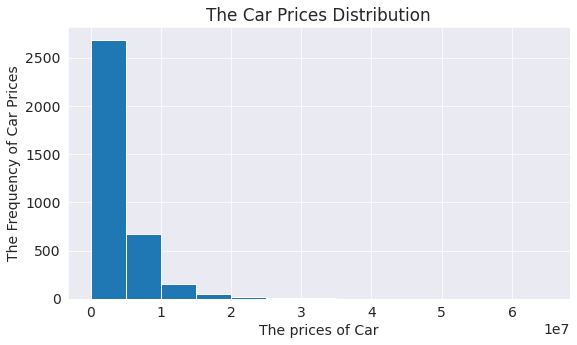

In [29]:
cars_df.price.hist(bins=np.arange(0, 70000000, 5000000))
plt.xlabel("The prices of Car")
plt.ylabel("The Frequency of Car Prices")
plt.title("The Car Prices Distribution");

The prices in the dataset is skew to the right since the majority of the cars are less than 5 million naira

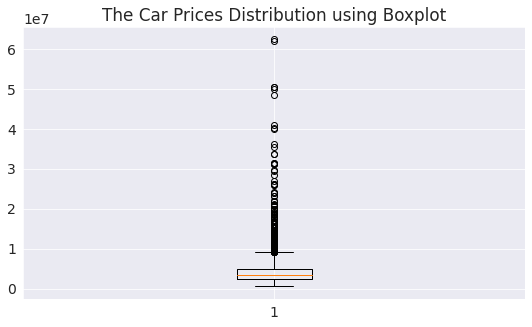

In [30]:
plt.boxplot(cars_df["price"])
plt.title("The Car Prices Distribution using Boxplot");

In [131]:
cars_df[cars_df.price<5000000]

,car_id,price,fuel_type,gear_type,make,Model,year_of_manufacture,colour,condition,mileage,engine_size,selling_condition,bought_condition
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered
8,fYxBktHsYw4js3ZgJnHwl2zU,3885000,Petrol,Automatic,Toyota,Camry,2007,Gold,Foreign Used,159726.0,3000.0,Imported,Imported
10,p2ie9iYOamIlpP6wyVmKi3d5,3432000,Petrol,Automatic,Toyota,Camry,2011,Black,Nigerian Used,128048.0,2500.0,Registered,Imported
14,aa8nq9ZiuiVXOMzlxJvdOPUK,3990000,Diesel,Manual,Lancia,Thesis,2007,White,Foreign Used,214524.0,2800.0,Imported,Imported
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,C4Ly76wwazrtbYRAWkTnv2Q5,1924000,Petrol,Automatic,Toyota,RAV4,2003,Red,Nigerian Used,282769.0,2000.0,Registered,Imported
3718,jPA7XlJJxdwpZStlurumw59q,1890000,Petrol,Automatic,Mercedes-Benz,M Class,2002,Silver,Nigerian Used,182544.0,3200.0,Registered,Registered
3719,g5szhuHeXu2djH1Z2be22G7E,1155000,Petrol,Automatic,Toyota,Camry,2000,Black,Nigerian Used,234354.0,2200.0,Registered,Registered
3720,mdZMNQK7Zez0cSS67Q9Quhzr,1260000,Petrol,Automatic,Toyota,RAV4,2001,Black,Nigerian Used,345926.0,2000.0,Registered,Registered


The above boxplot shows the majority of used car prices in the dataset are less than 5 million naira

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [31]:
cars_df.groupby('fuel_type')['fuel_type'].count().sort_values(ascending=False)

fuel_type
Petrol      3550
Hybrid        35
Diesel        14
Electric       1
Name: fuel_type, dtype: int64

Out of 3600 samples of cars in the dataset, only 50 cars are not petrol fuel type

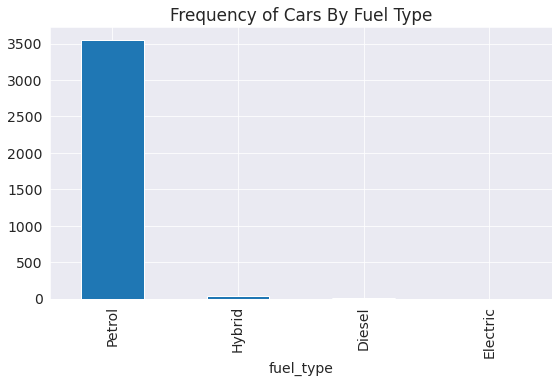

In [32]:
cars_df.groupby('fuel_type')['fuel_type'].count().sort_values(ascending=False).plot(kind='bar')
plt.title("Frequency of Cars By Fuel Type");

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [33]:
cars_make=cars_df.groupby('make')['make'].count().sort_values(ascending=False)
cars_make.head()

make
Toyota           1565
Honda             348
Lexus             341
Mercedes-Benz     282
Hyundai           153
Name: make, dtype: int64

In [34]:
np.size(cars_df.make.unique())

49

There are 49 unique car make in the data set

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

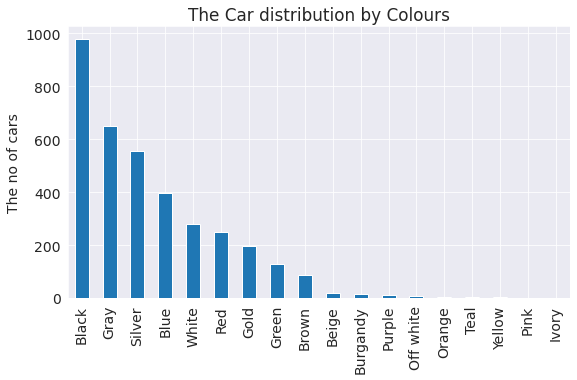

In [35]:
cars_df.colour.value_counts().plot(kind='bar')
plt.ylabel("The no of cars")
plt.title("The Car distribution by Colours");

In [36]:
cars_df['colour'].unique()

array(['Silver', 'Green', 'White', 'Gray', 'Red', 'Gold', 'Black', 'Blue',
       'Brown', 'Beige', 'Burgandy', 'Purple', 'Pink', 'Off white',
       'Teal', 'Ivory', 'Orange', 'Yellow'], dtype=object)

Black cars are the most common cars in the data set follow by Gray, silver, blue, white etc. While ivory is the least

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

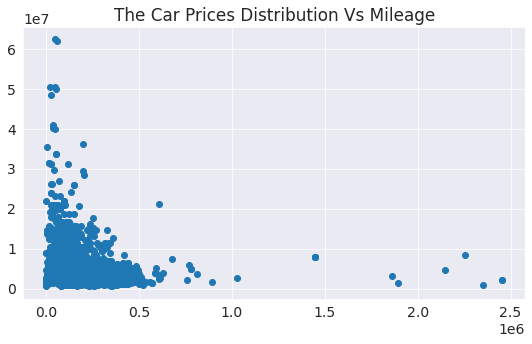

In [37]:
plt.scatter(y=cars_df.price, x=cars_df.mileage)
plt.title("The Car Prices Distribution Vs Mileage");

The scatter graph shows that cars with low mileage have higher cost than those that have high mileage.

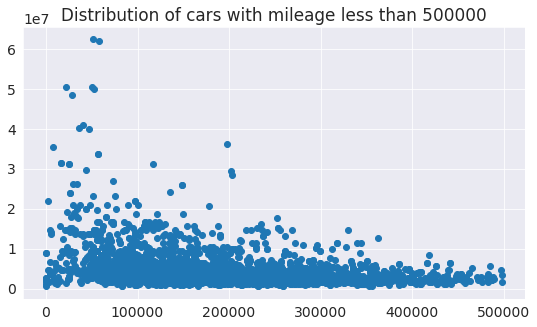

In [132]:
 plt.scatter(y=cars_df.price[cars_df.mileage<500000], x=cars_df.mileage[cars_df.mileage<500000])  
plt.title("Distribution of cars with mileage less than 500000");

Let us save and upload our work to Jovian before continuing

In [39]:
import jovian

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "oladapomatthewkayode/analyzing-nigerian-car-features-and-prices" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/oladapomatthewkayode/analyzing-nigerian-car-features-and-prices


'https://jovian.com/oladapomatthewkayode/analyzing-nigerian-car-features-and-prices'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - what is the summary statistics of car prices less than 3 million naira

In [41]:
cars_less_than_3m = cars_df.price[cars_df.price<3000000]
cars_less_than_3m.describe()

count    1.523000e+03
mean     2.136973e+06
std      5.413909e+05
min      5.500000e+05
25%      1.690000e+06
50%      2.130000e+06
75%      2.611000e+06
max      2.992500e+06
Name: price, dtype: float64

75% of the car prices are less than 2.6 million naira. The average car price and median are almost the same.

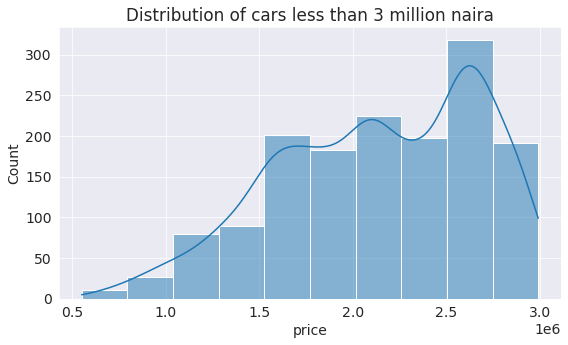

In [134]:
#cars_less_than_3m.hist()
sns.histplot(cars_less_than_3m, bins=10, kde=True)
plt.title("Distribution of cars less than 3 million naira");

#### Q2: TODO - what is the percentage of nigerian used cars to foreign used cars of cars greater than 3million naira

In [56]:
cars_df_gt_than_3m= cars_df[cars_df.price>3000000]
cars_df_gt_than_3m.head()

,car_id,price,fuel_type,gear_type,make,Model,year_of_manufacture,colour,condition,mileage,engine_size,selling_condition,bought_condition
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered
5,cXCDdlfYhkTgnpxVlSqsiBWz,5250000,Petrol,Automatic,Acura,ZDX,2010,White,Nigerian Used,93991.0,3700.0,Registered,Imported


In [57]:
cars_df_gt_than_3m.condition.value_counts(normalize=True)*100

Nigerian Used    61.819933
Foreign Used     38.131921
Brand New         0.048146
Name: condition, dtype: float64

As we can see the Nigerian used cars make up 62%, while foriegn used cars make up 38% of the car prices greater than 3 million at cars45. There is one brand new car less than 3million naira

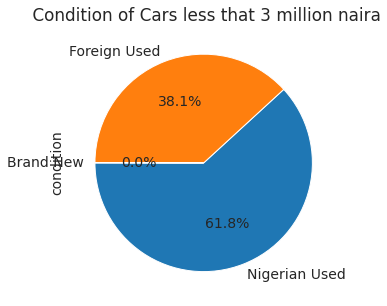

In [55]:
(cars_df_less_than_3m.condition.value_counts(normalize=True)*100).plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title(" Condition of Cars less that 3 million naira");

#### Q3: TODO - what is the percentage distribution of Toyota cars which are more than 3 million naira?

In [77]:
toyota_cars=cars_df_gt_than_3m[cars_df_gt_than_3m.make=="Toyota"]


In [80]:
toyota_cars.Model.value_counts(normalize=True)*100

Camry                 33.446712
Corolla               20.634921
Highlander            11.904762
RAV4                   7.256236
Sienna                 6.235828
Venza                  5.668934
Tacoma                 1.700680
Hilux                  1.473923
Matrix                 1.360544
Land Cruiser Prado     1.247166
4-Runner               1.247166
Tundra                 1.133787
Avalon                 1.133787
Land Cruiser           1.020408
HiAce                  0.680272
Fortuner               0.566893
Sequoia                0.566893
Avensis                0.453515
FJ Cruiser             0.453515
Yaris                  0.453515
Previa                 0.340136
Corolla Altis          0.226757
Solara                 0.226757
Prius                  0.226757
Avensis Verso          0.226757
Corolla Verso          0.113379
Name: Model, dtype: float64

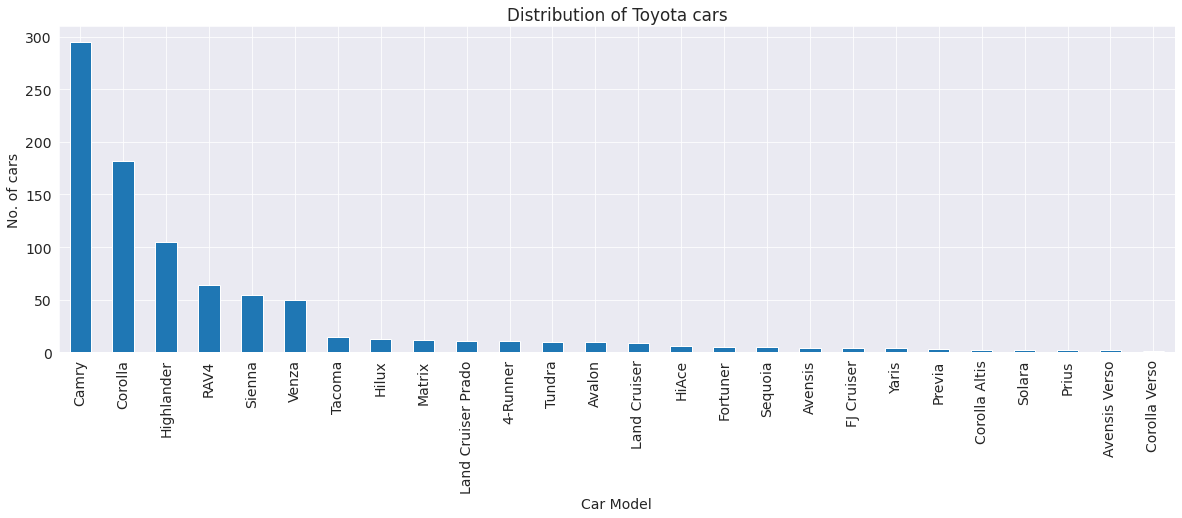

In [98]:
plt.figure(figsize=(20,6))
toyota_cars.Model.value_counts().plot(kind="bar"),
plt.xlabel("Car Model"),
plt.ylabel("No. of cars")
plt.title("Distribution of Toyota cars");

Toyota camry cars make more than 33%, while corrola make upto 20%, 
Highlander is the next after corrolla which make upto 7% in the toyota cars more than 3 million naira

#### Q4: TODO - what is the percentage distribution of cars according to their make whose price are more than 3 million naira

In [88]:
cars_df_gt_than_3m.make.value_counts(normalize=True)*100

Toyota           42.465094
Lexus            13.143958
Mercedes-Benz    11.314396
Honda             5.392393
Ford              5.344247
Hyundai           4.670197
Nissan            2.262879
Kia               2.022147
Acura             1.974001
Land Rover        1.829562
BMW               1.685123
Mazda             1.107366
Mitsubishi        1.011074
Volkswagen        0.770342
Infiniti          0.770342
Audi              0.674049
Dodge             0.577756
Pontiac           0.433317
Jeep              0.385171
Chevrolet         0.337025
Cadillac          0.192585
Peugeot           0.192585
GMC               0.144439
Mini              0.144439
Subaru            0.144439
Chrysler          0.144439
Scion             0.096293
Rover             0.096293
Porsche           0.096293
Volvo             0.096293
Lincoln           0.048146
Iveco             0.048146
Mercury           0.048146
Saturn            0.048146
Suzuki            0.048146
Bentley           0.048146
GAC               0.048146
L

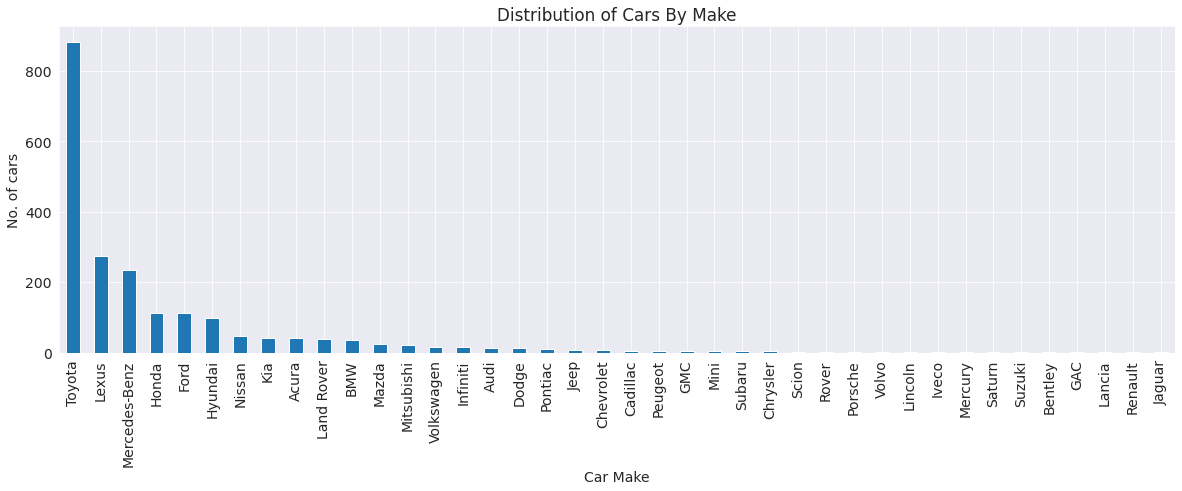

In [94]:
plt.figure(figsize=(20,6))
cars_df_gt_than_3m.make.value_counts().plot(kind="bar")
plt.xlabel("Car Make"),
plt.ylabel("No. of cars")
plt.title("Distribution of Cars By Make");

Toyota cars is the populous car make in this category with more than 42% while lexus occupy the second position with 13,14%. Mercedes-Benz and Honda occupy the 3rd and fourth position with   11.31 and 5.39 respectively
Honda             5.392393

#### Q5: TODO - How many toyota camry car of the year 2010 and above are less than 3 million naira

In [121]:
cars_lt_3m=cars_df[cars_df.price<3000000]
camry_cars_lt_3m_yr_frm_2010=cars_lt_3m[cars_lt_3m.make=="Toyota"][cars_lt_3m.Model=="Camry"][cars_lt_3m.year_of_manufacture>=2010]

/tmp/ipykernel_57/2343593751.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  camry_cars_lt_3m_yr_frm_2010=cars_lt_3m[cars_lt_3m.make=="Toyota"][cars_lt_3m.Model=="Camry"][cars_lt_3m.year_of_manufacture>=2010]


In [122]:
print("The no. of toyota camry cars of the year 2010 and above are less than 3 million naira", 
      + 
len(camry_cars_lt_3m_yr_frm_2010))

The no. of toyota camry cars of the year 2010 and above are less than 3 million naira 9


We can get 9 Toyota camry cars with year from 2010 and above whose price are less than 3 million naira

Let us save and upload our work to Jovian before continuing.

In [123]:
import jovian

In [124]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "oladapomatthewkayode/analyzing-nigerian-car-features-and-prices" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/oladapomatthewkayode/analyzing-nigerian-car-features-and-prices


'https://jovian.com/oladapomatthewkayode/analyzing-nigerian-car-features-and-prices'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.
1. The prices of cars in the dataset ranges from 500,000 to 62400000. The mean is bigger than the median. 75% of the car prices are less than 5 million naira
2. The prices in the dataset is skew to the right since the majority of the cars are less than 5 million naira
3. Out of 3600 samples of cars in the dataset, only 50 cars are not petrol fuel type
4. There are 49 unique car make in the data set
5. Black cars are the most common cars in the data set follow by Gray, silver, blue, white etc. While ivory is the least
6. The cars with low mileage have higher cost than those that have high mileage.
7. In the subset of cars whose prices are less than 3 million naira; 75% of the car prices are less than 2.6 million naira. The average car price and median are almost the same.
8. The Nigerian used cars make up 62%, while foriegn used cars make up 38% of the car prices greater than 3 million at cars45. There is one brand new car less than 3million naira
9. Toyota camry cars make more than 33%, while corrola make upto 20%, Highlander is the next after corrolla which make upto 7% in the cars more than 3 million naira
10. Toyota camry cars make more than 33%, while corrola make upto 20%, Highlander is the next after corrolla which make upto 7% in the toyota cars more than 3 million naira
11. Toyota cars is the populous car make in this category with more than 42% while lexus occupy the second position with 13,14%. Mercedes-Benz and Honda occupy the 3rd and fourth position with 11.31 and 5.39 respectively Honda 5.392393
12. We can get 9 Toyota camry cars with year from 2010 and above whose price are less than 3 million naira

The dataset contains 3700+ cars and their prices in Naira. The data was web scraped from cars45, Nigeria's largest car sales website. The data contains features such as car make, model, year of manufacture, mileage, price, etc. 
I got the dataset from kaggle site by the user makindekayode. 
Special thanks to jovian for this free amazing skills I learnt from their platform


In [135]:
import jovian

In [136]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "oladapomatthewkayode/analyzing-nigerian-car-features-and-prices" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/oladapomatthewkayode/analyzing-nigerian-car-features-and-prices


'https://jovian.com/oladapomatthewkayode/analyzing-nigerian-car-features-and-prices'

## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

- https://www.kaggle.com/datasets/makindekayode/nigerian-car-prices-dataset
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets

As a next step, you can try out a project on another dataset of your choice: https://jovian.ml/aakashns/zerotopandas-course-project-starter .

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [137]:
import jovian

In [138]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "oladapomatthewkayode/analyzing-nigerian-car-features-and-prices" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/oladapomatthewkayode/analyzing-nigerian-car-features-and-prices


'https://jovian.com/oladapomatthewkayode/analyzing-nigerian-car-features-and-prices'